# FT_Linear_Regression
### An Introduction to Machine Learning

#### Packages used
- **pandas** to read_csv
- **matplotlib** for data visualization
- **seaborn** for matplotlib additions

# Assignment

### 1.
Predict the price of a car for a given mileage. When you launch the program, it should prompt you for a mileage, and then give you back the estimated price for that mileage. The programm will use the following hypothesis

### $estimatedPrice(mileage) = \theta_0 + (\theta_1 * mileage)$

In [1]:
# Initializing Theta- and Theta1
t0 = 8000
t1 = -2

In [2]:
# Calculate estimated price given the hypothesis
def estimatedPrice(mileage):
    return(t0 + t1*mileage)

# Prompt user for mileage, return estimated price for that mileage
def promptUser():
    tmp = float(input('Mileage '))
    print('Estimated Price: ', round(estimatedPrice(tmp),2), '$')

In [3]:
promptUser()

Mileage 5670
Estimated Price:  -3340.0 $


### 2.
Read the data, perform a linear regression and save the variables $\theta_0$ and $\theta_1$ for part 1.

You will use the following formulas and choose a value for $m$:

### $tmp\theta_0 = learningRate * \frac{1}{m}\sum_{i=0}^{m-1}(estimatedPrice(mileage[i] - price[i])$

### $tmp\theta_1 = learningRate * \frac{1}{m}\sum_{i=0}^{m-1}(estimatedPrice(mileage[i] - price[i])*mileage[i]$

Don't forget to simultaneously update $\theta_0$ and $\theta_1$

In [4]:
import pandas as pd
data = pd.read_csv('data.csv')

## Linear Regression from scratch
### $Y = \theta_0 + \theta_1X$
## $\theta_1 = \frac{\sum_{i=1}^{m}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{m}(x_i-\bar{x})^2}$
### $\theta_0 = \bar{y}-\theta_1\bar{x}$

In [5]:
def linreg(data):
    X = data.km
    Y = data.price
    
    x_bar = sum(X)/len(X)
    y_bar = sum(Y)/len(Y)
    
    t1 = sum((X-x_bar)*(Y-y_bar))/sum((X-x_bar)*(X-x_bar))
    t0 = y_bar - t1*x_bar
    
    return(t0, t1)

In [6]:
# Calculate Theta0 and Theta1 using OLS
t0, t1 = linreg(data)
t0, t1

(8499.599649933216, -0.0214489635917023)

## Visualization

In [7]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
# Seaborn for plotting and styling
import seaborn as sns
# Set theme
sns.set_style('whitegrid')
# Estimated Price for the dataset range
abline_values = [t1 * i + t0 for i in data.km]

(0, 253364.14921389337)

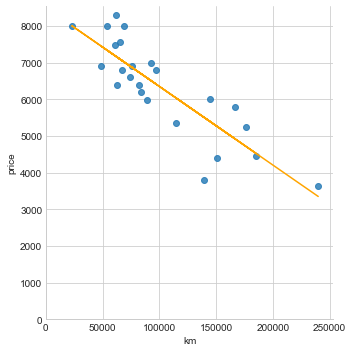

In [8]:
# Scatter plot
sns.lmplot(x='km', y='price', data=data, fit_reg=False)
# Calculated regression line
plt.plot(data.km, abline_values, 'orange')
# Aesthetics
plt.ylim(0, None)
plt.xlim(0, None)

## Gradient Descent
To improve algorithm performance we need to scale the variables first

In [9]:
def normalize(data):
    dataNew = data
    for column in data:
        mean = sum(data[column])/len(data[column])
        sd = data[column]-mean
        sd = (sum(sd*sd)/(len(sd)-1))**(0.5)
        dataNew[column] = (data[column]-mean)/sd
    return(dataNew)

In [10]:
nData = normalize(data)
print('        Minimum  Maximum')
print('km    ', round(min(nData.km),6), round(max(nData.km),6))
print('price ', round(min(nData.price),6), round(max(nData.price),6))

        Minimum  Maximum
km     -1.483975 2.637603
price  -2.032224 1.483848


Theta0:   0.0
Theta1:  -0.85614


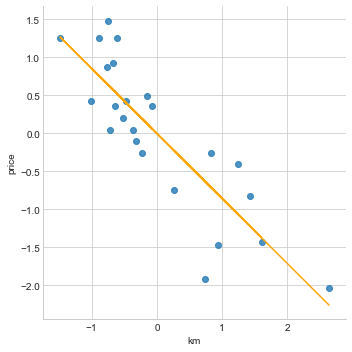

In [18]:
t0, t1 = linreg(nData)
print('Theta0:  ', round(t0, 5))
print('Theta1: ', round(t1, 5))

# Scatter plot
sns.lmplot(x='km', y='price', data=nData, fit_reg=False)
# Calculated regression line
abline_values = [t1 * i + t0 for i in nData.km]
plt.plot(nData.km, abline_values, 'orange')
plt.show()

### $tmp\theta_0 = learningRate * \frac{1}{m}\sum_{i=0}^{m-1}estimatedPrice(mileage[i]) - price[i]$

### $tmp\theta_1 = learningRate * \frac{1}{m}\sum_{i=0}^{m-1}(estimatedPrice(mileage[i]) - price[i])*mileage[i]$

# Not working clean version with lambda functions

In [91]:
# Initial starting values of Theta0 and Theta1
cur_t0, cur_t1 = 0, 0
# learning rate
rate = 0.01
# When do we stop the algorithm
precision = 0.000001
previous_step_size = 1
max_iters = 10000
# counter
iters = 0
printcount = 0
# Number of observations
m = len(nData.km)
# Gradient function
tmp0 = lambda x: (1/m)*sum(estimatedPrice(x.km) - x.price)
tmp1 = lambda x: (1/m)*sum((estimatedPrice(x.km) - x.price)*x.km)

In [92]:
while previous_step_size > precision and iters < max_iters:
    prev_t0 = cur_t0
    prev_t1 = cur_t1
    
    tmpt0 = cur_t0 - rate * tmp0(nData)
    tmpt1 = cur_t1 - rate * tmp1(nData)
    
    cur_t0 = tmpt0
    cur_t1 = tmpt1
    
    previous_step_size = ((cur_t0 - prev_t0)**2+(cur_t1 - prev_t1)**2)**(0.5)
    
    if(printcounter == 100 or iters == max_iters):
        print('Iteration: ', iters, '\nt0 ', round(cur_t0,7), ' t1', round(cur_t1,7))
        printcounter = 0
        
    iters += 1
    printcounter += 1

Iteration:  0 
t0  0.0  t1 -0.0082047
Iteration:  100 
t0  0.0  t1 -0.8286716
Iteration:  200 
t0  0.0  t1 -1.6491386
Iteration:  300 
t0  0.0  t1 -2.4696055
Iteration:  400 
t0  0.0  t1 -3.2900724
Iteration:  500 
t0  0.0  t1 -4.1105394
Iteration:  600 
t0  0.0  t1 -4.9310063
Iteration:  700 
t0  0.0  t1 -5.7514733
Iteration:  800 
t0  0.0  t1 -6.5719402
Iteration:  900 
t0  0.0  t1 -7.3924072
Iteration:  1000 
t0  0.0  t1 -8.2128741
Iteration:  1100 
t0  0.0  t1 -9.0333411
Iteration:  1200 
t0  0.0  t1 -9.853808
Iteration:  1300 
t0  0.0  t1 -10.674275
Iteration:  1400 
t0  0.0  t1 -11.4947419
Iteration:  1500 
t0  0.0  t1 -12.3152088
Iteration:  1600 
t0  0.0  t1 -13.1356758
Iteration:  1700 
t0  0.0  t1 -13.9561427
Iteration:  1800 
t0  0.0  t1 -14.7766097
Iteration:  1900 
t0  0.0  t1 -15.5970766
Iteration:  2000 
t0  0.0  t1 -16.4175436
Iteration:  2100 
t0  0.0  t1 -17.2380105
Iteration:  2200 
t0  0.0  t1 -18.0584775
Iteration:  2300 
t0  0.0  t1 -18.8789444
Iteration:  2400 
t

# Working Version

In [101]:
t0, t1 = 0, 0
print('  ', round(t0,6), round(t1,6))
printcounter = 0
lr = 0.01
m = len(nData.km)
tmp1 = 10
i = 0
while tmp1-t1>0.0001 and i<2201:
    tmp0 = lr/m*sum(estimatedPrice(nData.km) - nData.price)
    tmp1 = lr/m*sum((estimatedPrice(nData.km) - nData.price)*nData.km)
    
    if(printcounter==100):
        print(i, round(t0,8), round(t1,8))
        printcounter = 0
    
    t0 = t0 - tmp0
    t1 = t1 - tmp1
    printcounter +=1
    i += 1

   0 0
100 0.0 -0.52929694
200 0.0 -0.73136301
300 0.0 -0.80850438
400 0.0 -0.83795412
500 0.0 -0.84919694
600 0.0 -0.85348904
700 0.0 -0.8551276
800 0.0 -0.85575315
900 0.0 -0.85599196
1000 0.0 -0.85608312
1100 0.0 -0.85611793
1200 0.0 -0.85613122
1300 0.0 -0.85613629
1400 0.0 -0.85613822
1500 0.0 -0.85613896
1600 0.0 -0.85613925
1700 0.0 -0.85613935
1800 0.0 -0.8561394
1900 0.0 -0.85613941
2000 0.0 -0.85613942
2100 0.0 -0.85613942
2200 0.0 -0.85613942


Theta0:  0.0
Theta1:  -0.84584


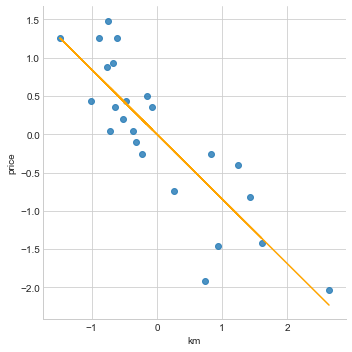

In [95]:
print('Theta0: ', round(t0, 5))
print('Theta1: ', round(t1, 5))

# Scatter plot
sns.lmplot(x='km', y='price', data=nData, fit_reg=False)
# Calculated regression line
abline_values = [t1 * i + t0 for i in nData.km]
plt.plot(nData.km, abline_values, 'orange')
plt.show()